In [2]:
pip install psycopg2

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install psycopg2-binary

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
    --------------------------------------- 0.0/1.2 MB 131.3 kB/s eta 0:00:09
    --------------------------------------- 0.0/1.2 MB 131.3 kB/s eta 0:00:09
   - -------------------------------------- 0.0/1.2 MB 146.3 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.2 MB 151.3 kB/s eta 0:00:08
   - -------------------------------------- 0.0/1.2 MB 151.3 kB/s eta 0:00:08
   - -------------------------------------- 0.1/1.2 MB 124.9 kB/s eta 0:00:09
   --- ------------------------------------ 0.1/1.2 MB 245.8 kB/s eta 0:00:05
   ---- ----------------------------------- 0.1/1.2 MB 277.4 kB/s eta 0:00:04
   ---- ----------------------------------- 0.1/1.2 MB 277.4 kB/s eta 0:00:04
   ----- -------------

In [8]:
import psycopg2

In [88]:
import psycopg2

conn = None 

try:
    conn = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )
    
    cur = conn.cursor()
    
    cur.execute('SELECT version()')
    

    db_version = cur.fetchone()
    print(f"PostgreSQL veritabanı sürümü: {db_version}")
    
    cur.close()
except Exception as error:
    print(f"Bir hata oluştu: {error}")
finally:
    if conn is not None:
        conn.close()


PostgreSQL veritabanı sürümü: ('PostgreSQL 16.2, compiled by Visual C++ build 1937, 64-bit',)


CAPSTONE-DATE


1-Retrieve the total number of orders for each year.

In [53]:
import psycopg2
import matplotlib.pyplot as plt



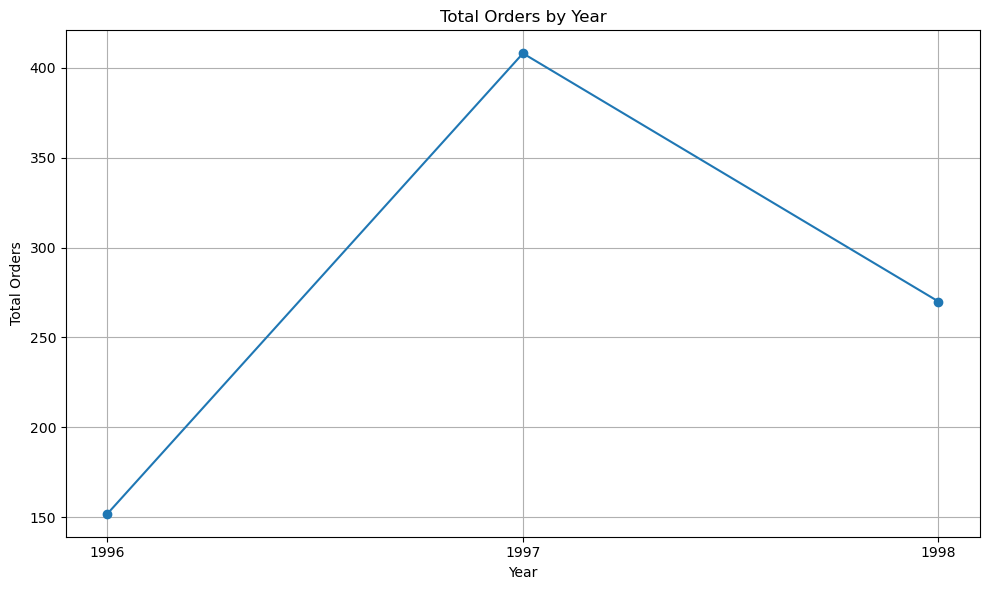

PostgreSQL bağlantısı başarıyla kapatıldı.


In [85]:
try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT EXTRACT(YEAR FROM order_date) as order_year,
           COUNT(order_id) as total_orders
    FROM orders
    GROUP BY 1
    ORDER BY 1;
    """
    cursor.execute(sql_query)
    results = cursor.fetchall()

    years = []
    total_orders = []
    for row in results:
        years.append(row[0])  # Year
        total_orders.append(row[1])  # Total Order
    plt.figure(figsize=(10, 6))
    plt.plot(years, total_orders, marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('Total Orders')
    plt.title('Total Orders by Year')
    plt.xticks(years)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    cursor.close()
    db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")



2- Retrieve the number of orders per quarter for each year.

In [90]:
import psycopg2
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
import numpy as np


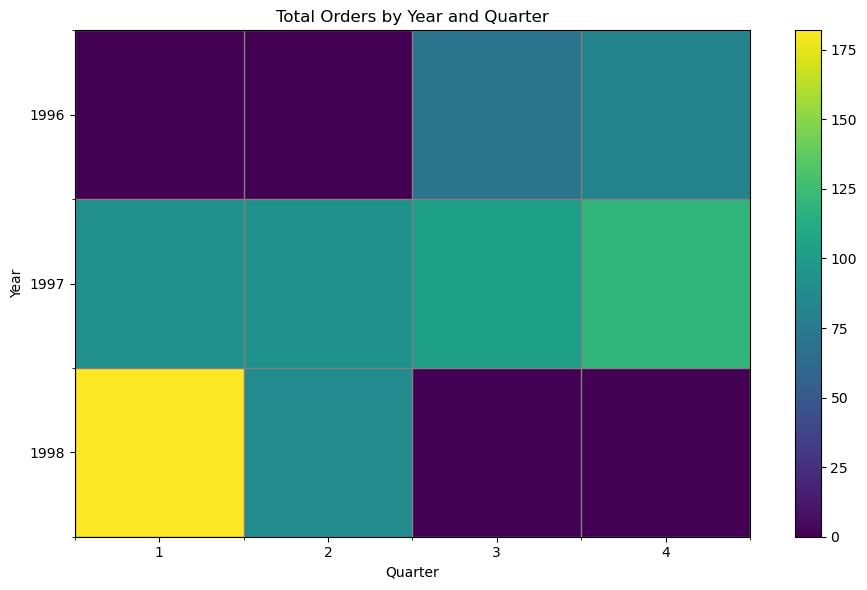

PostgreSQL bağlantısı başarıyla kapatıldı.


In [92]:
try:
    db_connection = psycopg2.connect(
       host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT EXTRACT(YEAR FROM order_date) as order_year,
           EXTRACT(QUARTER FROM order_date) as order_quarter,
           COUNT(order_id) as total_orders
    FROM orders
    GROUP BY 1, 2
    ORDER BY 1, 2;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    years = []
    quarters = []
    total_orders = []
    for row in results:
        years.append(int(row[0]))  # Year (integer)
        quarters.append(int(row[1]))  # Quarter (integer olarak alınır)
        total_orders.append(row[2])  # Total Order

    unique_years = sorted(set(years))
    unique_quarters = sorted(set(quarters))
    num_years = len(unique_years)
    num_quarters = len(unique_quarters)

    data = np.zeros((num_years, num_quarters))
    for i in range(len(years)):
        year_index = unique_years.index(years[i])
        quarter_index = unique_quarters.index(quarters[i])
        data[year_index, quarter_index] = total_orders[i]

    fig, ax = plt.subplots(figsize=(10, 6))
    im = ax.imshow(data, cmap='viridis')

    ax.set_xticks(np.arange(num_quarters))
    ax.set_yticks(np.arange(num_years))
    ax.set_xticklabels(unique_quarters)
    ax.set_yticklabels(unique_years)
    ax.set_xlabel('Quarter')
    ax.set_ylabel('Year')
    ax.set_title('Total Orders by Year and Quarter')
    plt.colorbar(im, ax=ax)

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))
    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    ax.grid(which='minor', color='gray', linestyle='-', linewidth=1)

    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    cursor.close()
    db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


3-Find the number of orders placed by each customer on a monthly basis for each year.

In [97]:
import psycopg2
import matplotlib.pyplot as plt


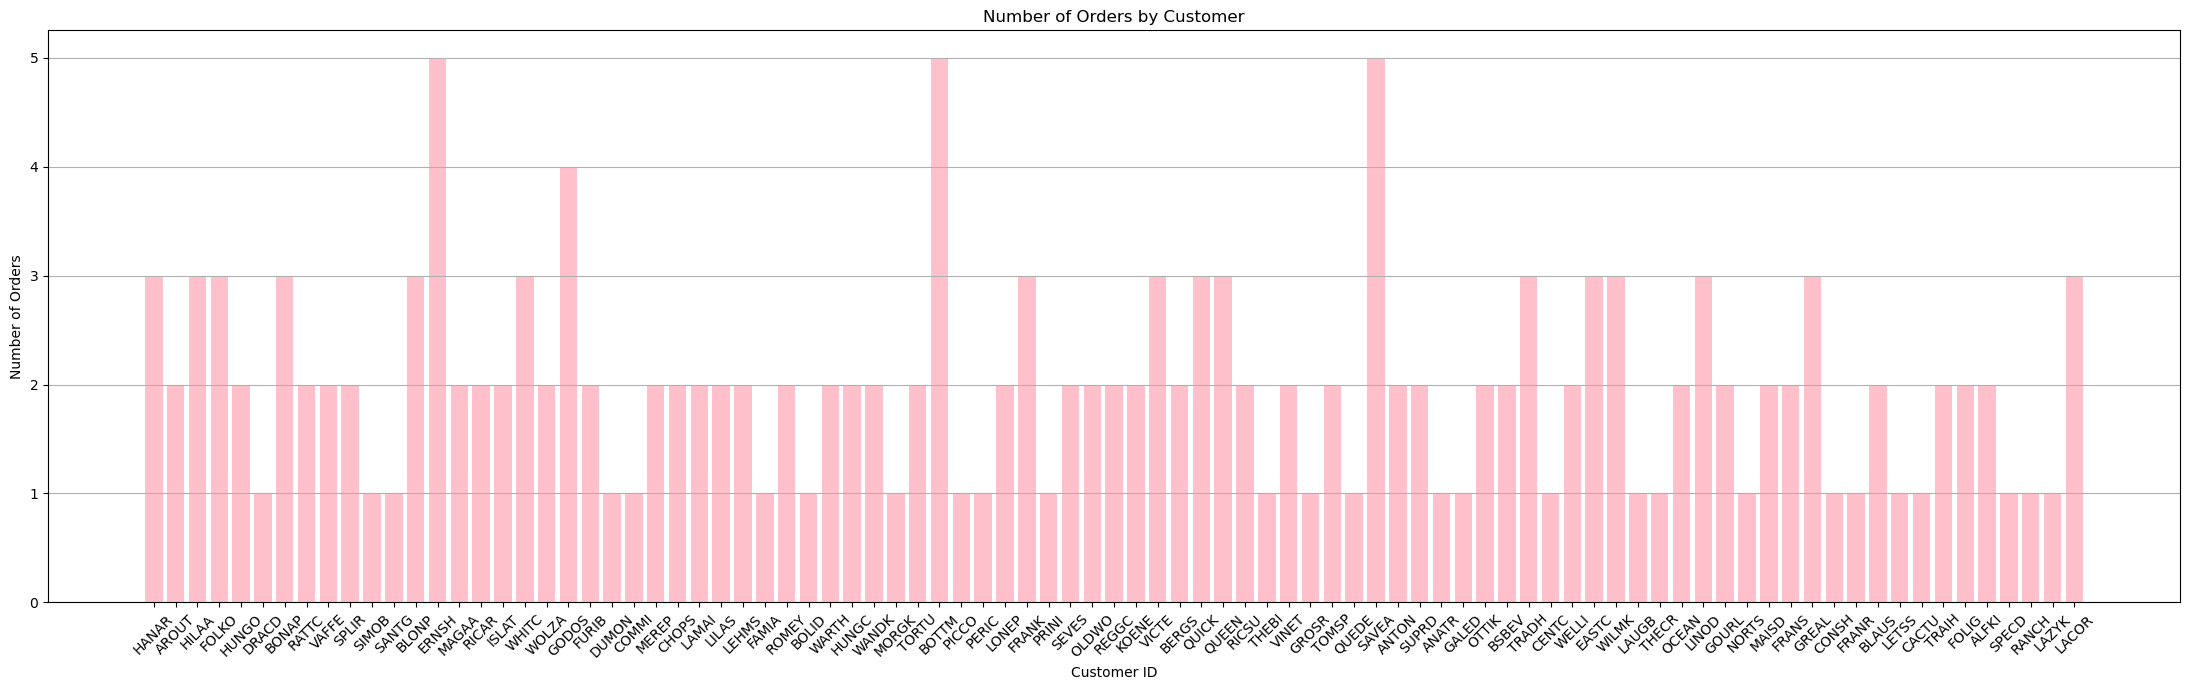

PostgreSQL bağlantısı başarıyla kapatıldı.


In [144]:
try:
   
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )
    cursor = db_connection.cursor()

    sql_query = """
    SELECT customer_id,
           COUNT(customer_id) as number_of_order,
           EXTRACT(YEAR FROM order_date) as years,
           EXTRACT(MONTH FROM order_date) as months
    FROM orders
    GROUP BY 1, 3, 4
    ORDER BY 3;
    """

    cursor.execute(sql_query)
    results = cursor.fetchall()

    customers = []
    orders = []
    for row in results:
        customers.append(row[0])  # Customer ID
        orders.append(row[1])  # Order Count

    plt.figure(figsize=(22, 7))
    plt.bar(customers, orders, color='pink')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Orders')
    plt.title('Number of Orders by Customer')
    plt.xticks(rotation=45)
    plt.grid(True, axis='y')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    cursor.close()
    db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


4- List the customers who placed the most orders between '1996-09-15' and '1998-01-12' and display their respective companies.

In [128]:
import psycopg2
import matplotlib.pyplot as plt


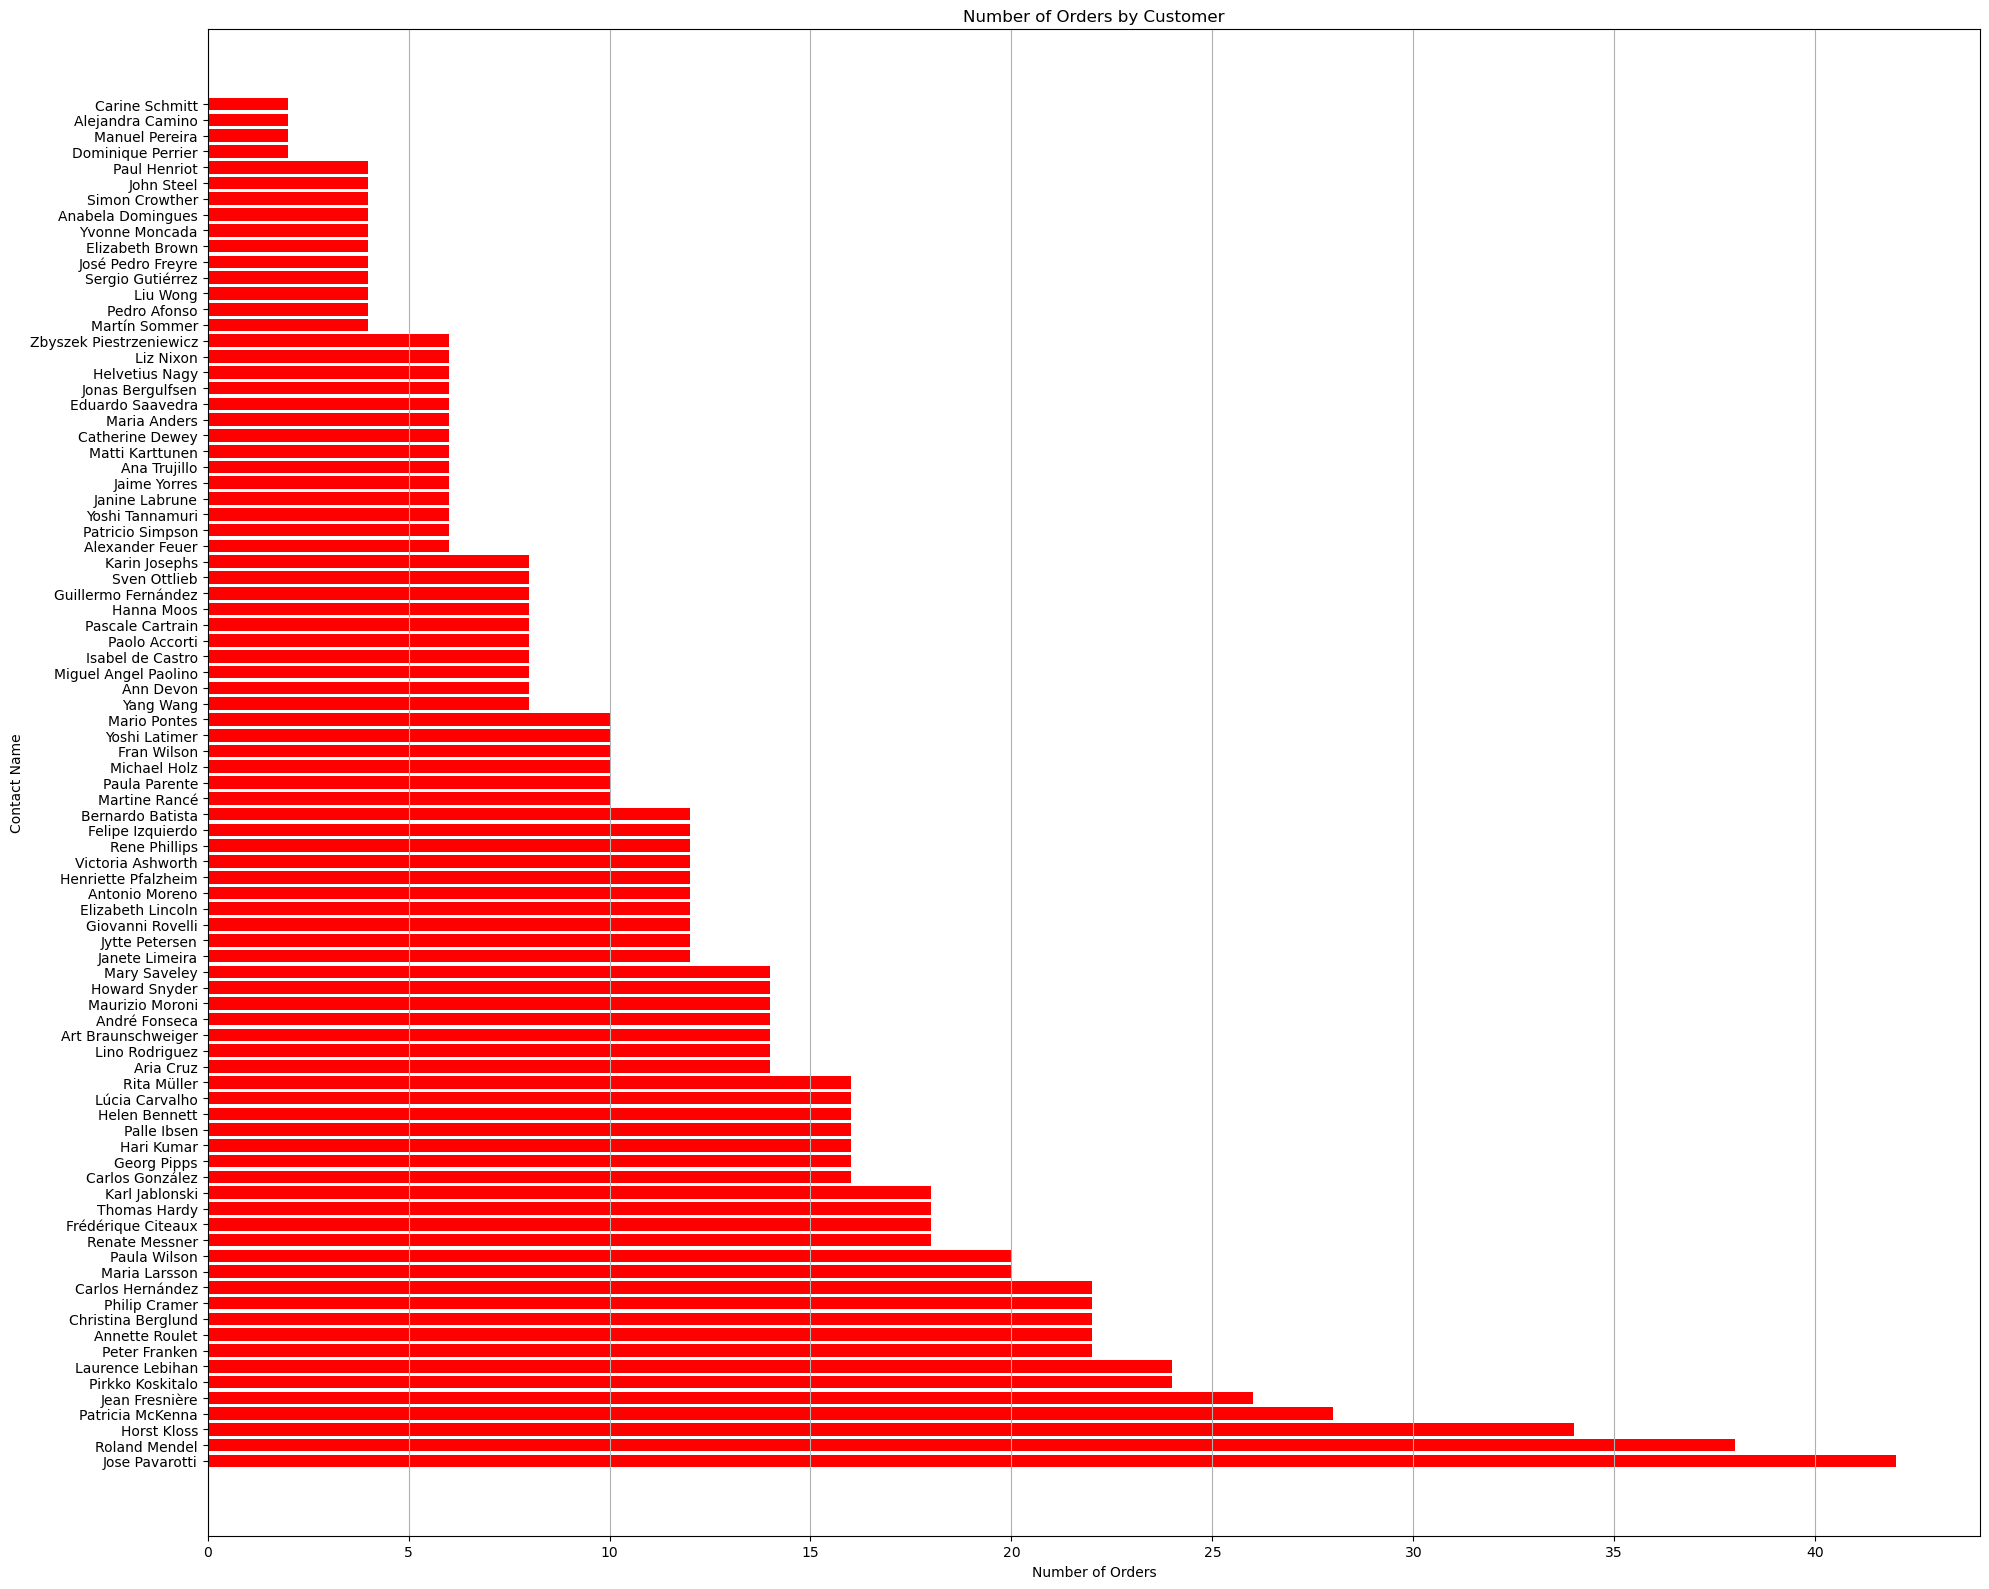

PostgreSQL bağlantısı başarıyla kapatıldı.


In [157]:
try:
   
    db_connection = psycopg2.connect(
       host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT c.customer_id,
           c.contact_name,
           COUNT(o.order_id) as order_count,
           c.company_name
    FROM orders o
    LEFT JOIN customers c ON c.customer_id = o.customer_id
    WHERE o.order_date BETWEEN '1996-09-15' AND '1998-01-12'
    GROUP BY 1, 2, 4
    ORDER BY 3 DESC;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    customer_ids = []
    contact_names = []
    order_counts = []
    company_names = []
    for row in results:
        customer_ids.append(row[0])  # Customer ID
        contact_names.append(row[1])  # Contact Name
        order_counts.append(row[2])  # Order Count
        company_names.append(row[3])  # Company Name

   
    plt.figure(figsize=(20, 16))
    plt.barh(contact_names, order_counts, color='red')
    plt.xlabel('Number of Orders')
    plt.ylabel('Contact Name')
    plt.title('Number of Orders by Customer')
    plt.grid(True, axis='x')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
 
    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


5- Determine the number of repeat customers on a yearly basis.

In [153]:
import psycopg2
import matplotlib.pyplot as plt


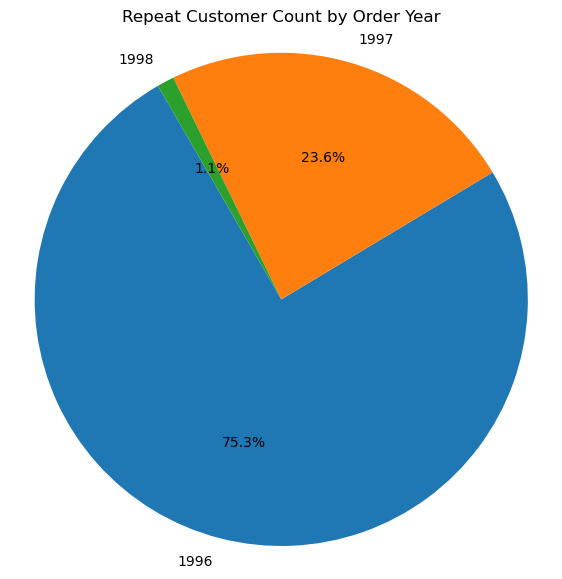

PostgreSQL bağlantısı başarıyla kapatıldı.


In [169]:
import psycopg2
import matplotlib.pyplot as plt

try:

    db_connection = psycopg2.connect(
       host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT EXTRACT(YEAR FROM first_order_date) AS order_year,
           COUNT(DISTINCT customer_id) AS repeat_customer_count
    FROM (SELECT customer_id, MIN(order_date) AS first_order_date
          FROM orders
          GROUP BY customer_id
         ) AS customer_first_orders
    GROUP BY 1
    ORDER BY 1;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    years = []
    repeat_customer_counts = []
    for row in results:
        years.append(row[0])  # Yıl
        repeat_customer_counts.append(row[1])  # Repeated Customer

    plt.figure(figsize=(7, 7))
    plt.pie(repeat_customer_counts, labels=years, autopct='%1.1f%%', startangle=120)
    plt.title('Repeat Customer Count by Order Year')
    plt.axis('equal')
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    
    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")



6-Retrieve the first and last order dates for each year.

In [192]:

import psycopg2
from tabulate import tabulate

try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT EXTRACT(YEAR FROM order_date) AS order_year,
           MIN(order_date) AS first_order_date,
           MAX(order_date) AS last_order_date
    FROM orders
    GROUP BY 1
    ORDER BY 1;
    """
    cursor.execute(sql_query)

    results = cursor.fetchall()

    table_headers = ['order_year', 'first_order_date', 'last_order_date']
    table = []
    for row in results:
        table.append([row[0], row[1], row[2]])

    print(tabulate(table, headers=table_headers, tablefmt="pretty"))

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


+------------+------------------+-----------------+
| order_year | first_order_date | last_order_date |
+------------+------------------+-----------------+
|    1996    |    1996-07-04    |   1996-12-31    |
|    1997    |    1997-01-01    |   1997-12-31    |
|    1998    |    1998-01-01    |   1998-05-06    |
+------------+------------------+-----------------+
PostgreSQL bağlantısı başarıyla kapatıldı.


CAPSTONE-REGION

1- Retrieve the customer count by cities.

In [ ]:
import psycopg2
import matplotlib.pyplot as plt


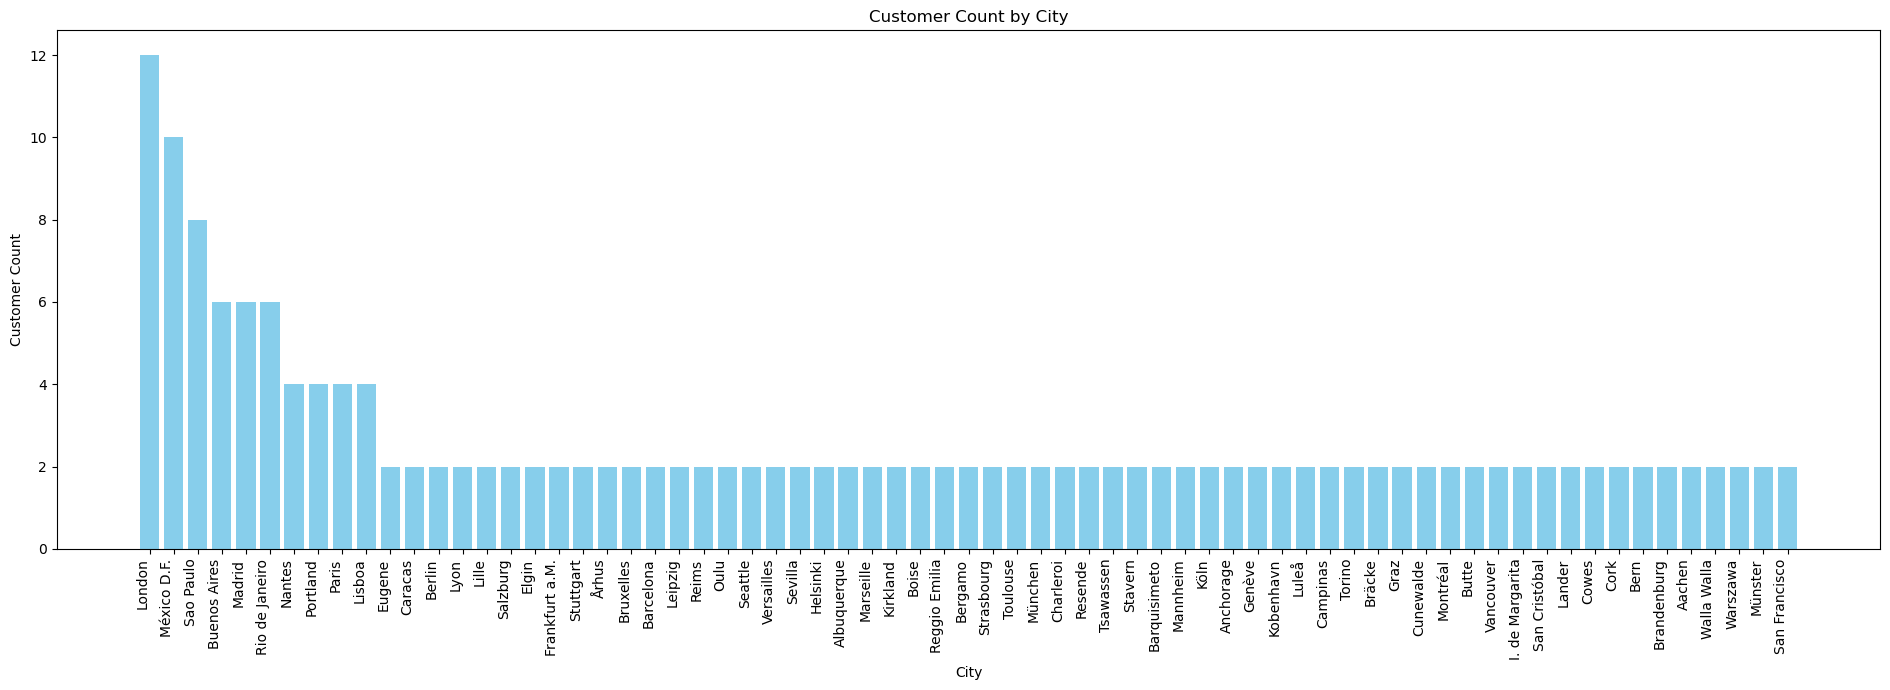

PostgreSQL bağlantısı başarıyla kapatıldı.


In [202]:

try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )
    
    cursor = db_connection.cursor()

    sql_query = """
    SELECT city,
           COUNT(customer_id) AS customer_count
    FROM customers
    GROUP BY city
    ORDER BY customer_count DESC;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    cities = []
    customer_counts = []
    for row in results:
        cities.append(row[0])
        customer_counts.append(row[1])

    plt.figure(figsize=(19, 7))
    plt.bar(cities, customer_counts, color='skyblue')
    plt.xlabel('City')
    plt.ylabel('Customer Count')
    plt.title('Customer Count by City')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


2- Retrieve the total number of orders by country.

In [ ]:
import psycopg2
import matplotlib.pyplot as plt


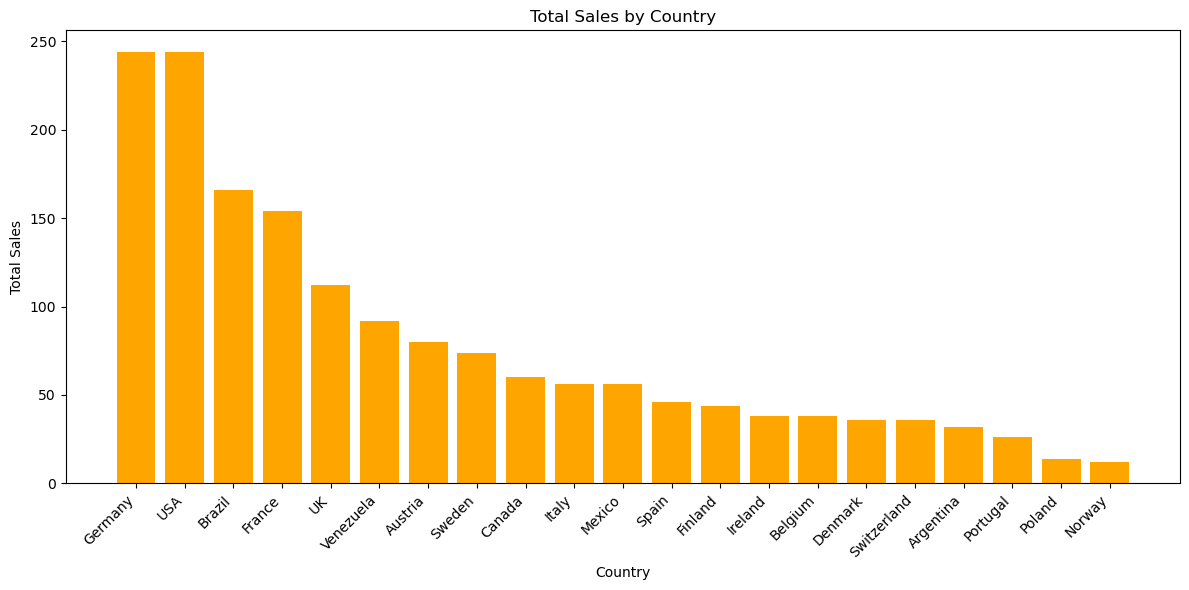

PostgreSQL bağlantısı başarıyla kapatıldı.


In [209]:

try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT country,
           COUNT(order_id) AS total_sales
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY country
    ORDER BY total_sales DESC;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    countries = []
    total_sales = []
    for row in results:
        countries.append(row[0])
        total_sales.append(row[1])

    plt.figure(figsize=(12, 6))
    plt.bar(countries, total_sales, color='orange')
    plt.xlabel('Country')
    plt.ylabel('Total Sales')
    plt.title('Total Sales by Country')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:

    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


3- Retrieve the total value of orders by country and city.

In [216]:

import psycopg2
import matplotlib.pyplot as plt

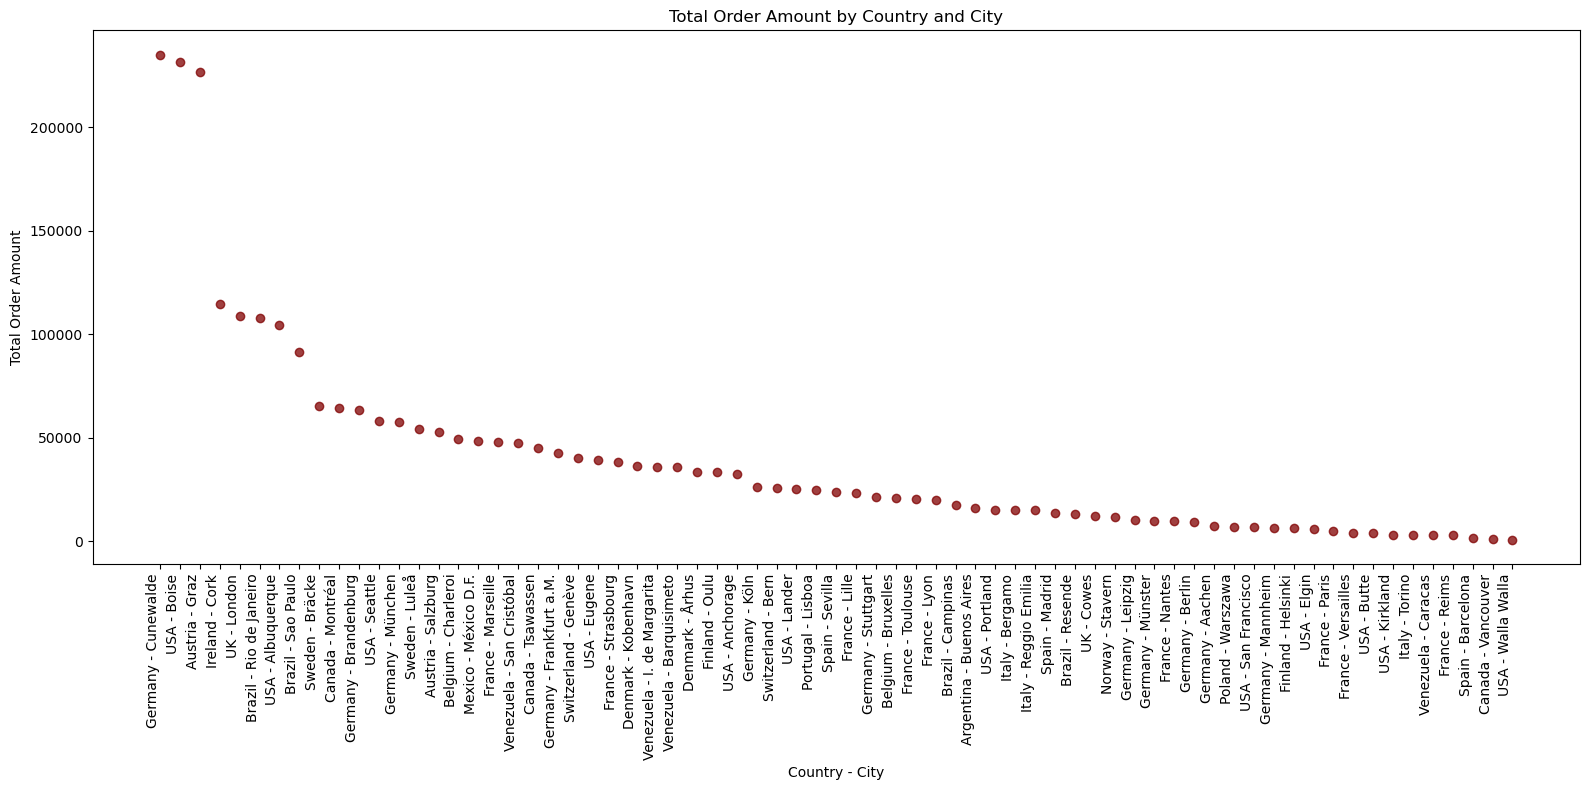

PostgreSQL bağlantısı başarıyla kapatıldı.


In [220]:

try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT country, city,
           ROUND(SUM(od.quantity * od.unit_price)) AS total_order_amount
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    LEFT JOIN order_details od ON od.order_id = o.order_id
    GROUP BY 1, 2
    ORDER BY total_order_amount DESC;
    """

    cursor.execute(sql_query)

    results = cursor.fetchall()

    countries_cities = [f"{row[0]} - {row[1]}" for row in results]
    total_order_amounts = [row[2] for row in results]

    plt.figure(figsize=(16, 8))
    plt.scatter(countries_cities, total_order_amounts, color='maroon', alpha=0.75)
    plt.xlabel('Country - City')
    plt.ylabel('Total Order Amount')
    plt.title('Total Order Amount by Country and City')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:

    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")


4-Compare the average order quantities across different countries.

In [227]:
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\aleyn\AppData\Local\Temp\ipykernel_18036\2308338961.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x=countries, y=avg_order_counts, jitter=True, palette='Set2')


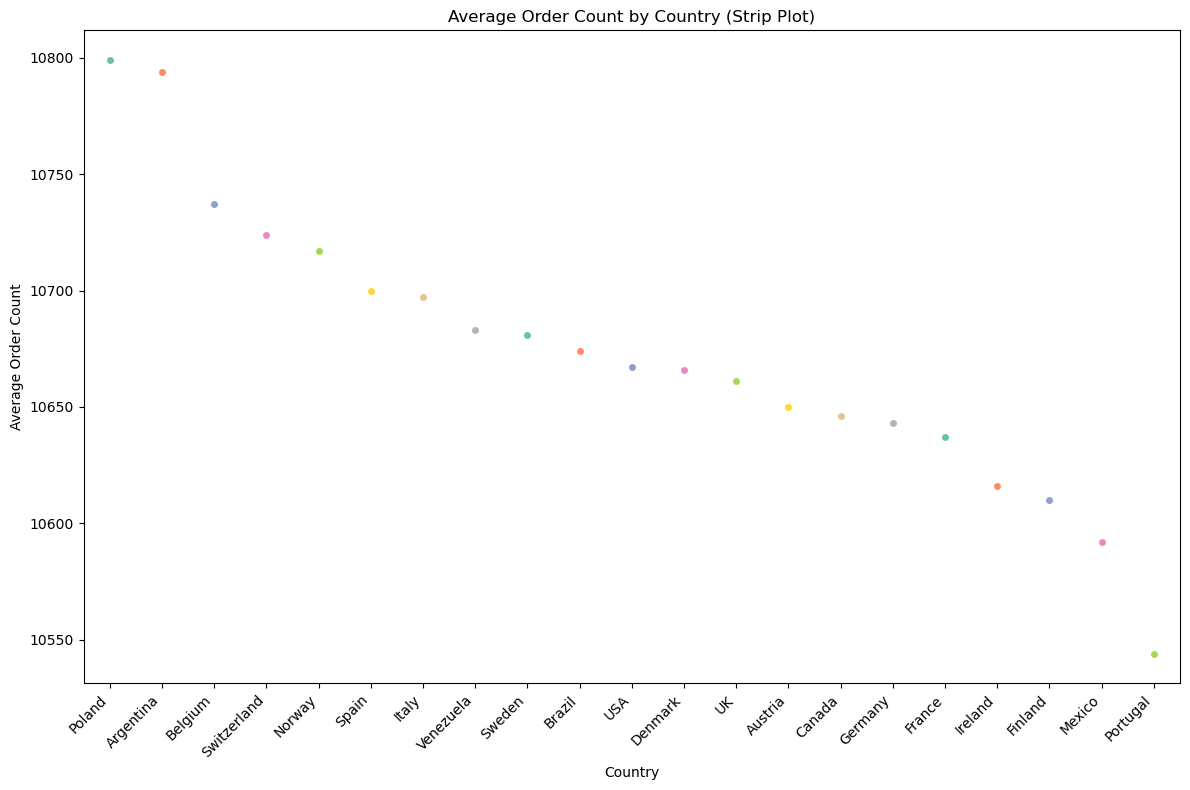

PostgreSQL bağlantısı başarıyla kapatıldı.


In [229]:

try:
    db_connection = psycopg2.connect(
        host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
    )

    cursor = db_connection.cursor()

    sql_query = """
    SELECT country,
           ROUND(AVG(order_id)) AS avg_order_count
    FROM customers c
    JOIN orders o ON c.customer_id = o.customer_id
    GROUP BY 1
    ORDER BY avg_order_count DESC;
    """
    cursor.execute(sql_query)

    results = cursor.fetchall()

    countries = [row[0] for row in results]
    avg_order_counts = [row[1] for row in results]

    plt.figure(figsize=(12, 8))
    sns.stripplot(x=countries, y=avg_order_counts, jitter=True, palette='Set2')
    plt.xlabel('Country')
    plt.ylabel('Average Order Count')
    plt.title('Average Order Count by Country (Strip Plot)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

except psycopg2.Error as e:
    print("Veritabanına bağlanırken veya sorgu çalıştırılırken bir hata oluştu:", e)

finally:
    if cursor:
        cursor.close()
    if db_connection:
        db_connection.close()
    print("PostgreSQL bağlantısı başarıyla kapatıldı.")



5-Retrieve the most preferred product categories for each city. 

In [246]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\aleyn\AppData\Local\Temp\ipykernel_18036\773539582.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


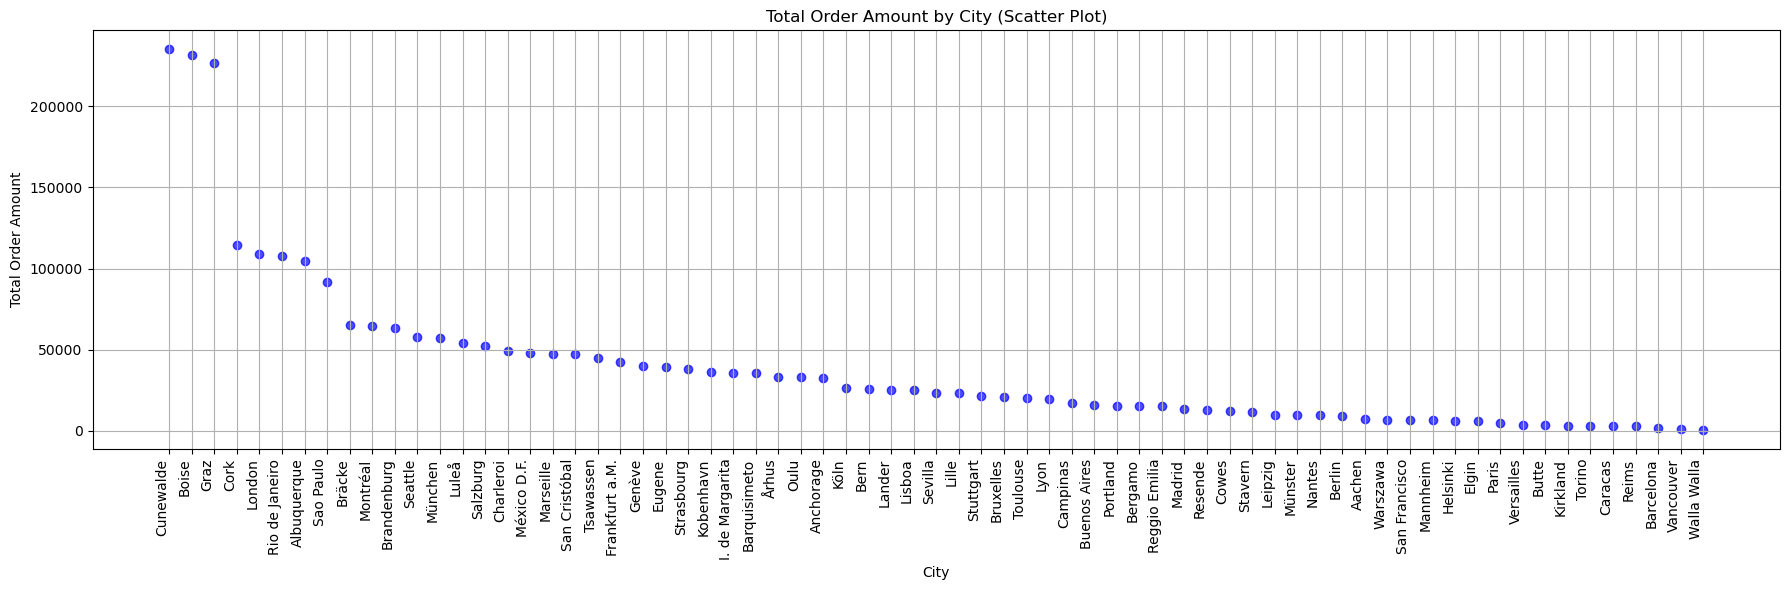

PostgreSQL bağlantısı başarıyla kapatıldı.


In [248]:

conn_params = {
   host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
}

try:
    conn = psycopg2.connect(**conn_params)
    
    sql_query = """
    SELECT city,
           ROUND(SUM(od.quantity * od.unit_price)) AS total_order_amount
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    LEFT JOIN order_details od ON o.order_id = od.order_id
    GROUP BY 1
    ORDER BY 2 DESC;
    """

    df = pd.read_sql_query(sql_query, conn)

    plt.figure(figsize=(18, 6))
    plt.scatter(df['city'], df['total_order_amount'], color='blue', alpha=0.7)
    plt.xlabel('City')
    plt.ylabel('Total Order Amount')
    plt.title('Total Order Amount by City (Scatter Plot)')
    plt.xticks(rotation=90, ha='right')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

except psycopg2.Error as e:
    print("PostgreSQL hatası:", e)

finally:
    if conn is not None:
        conn.close()
        print("PostgreSQL bağlantısı başarıyla kapatıldı.")


6-Retrieve the total discount by country.

In [253]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\aleyn\AppData\Local\Temp\ipykernel_18036\2251128883.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(sql_query, conn)


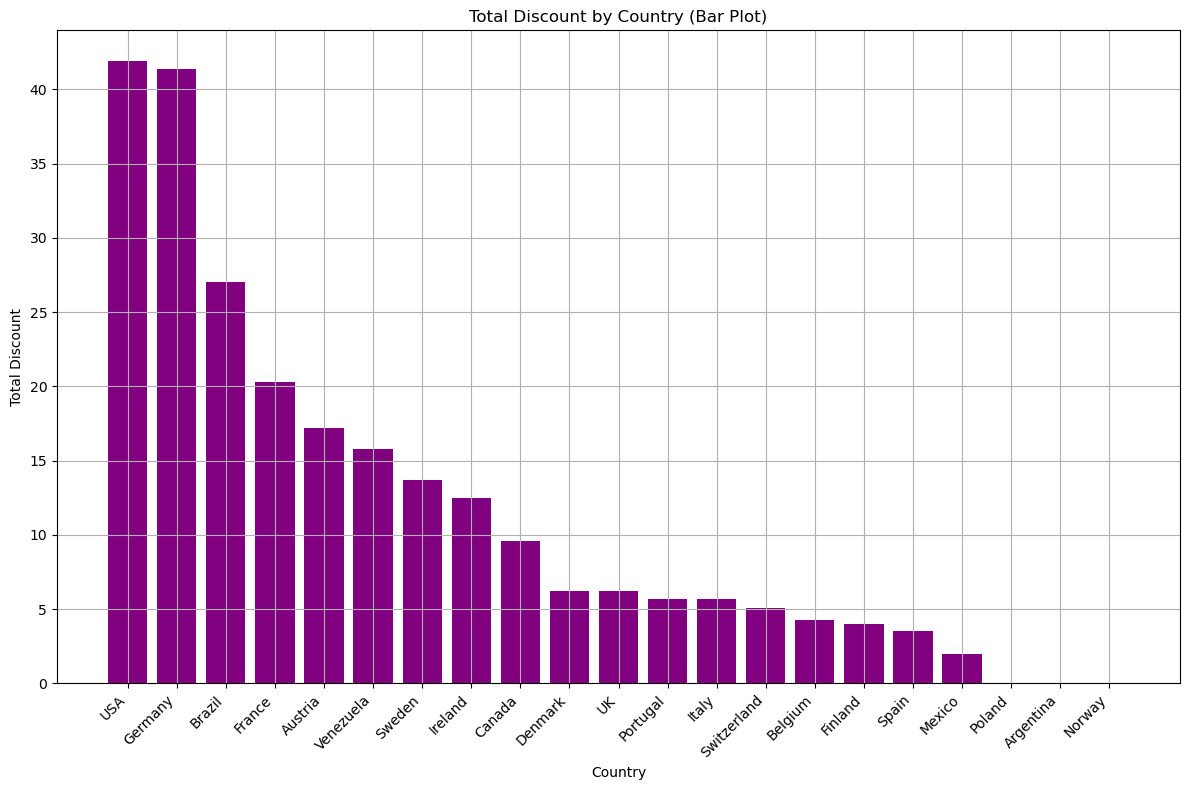

PostgreSQL bağlantısı başarıyla kapatıldı.


In [257]:

conn_params = {
    host="localhost",  
        port="****",       
        database="capstone",
        user="postgres",
        password="******"
}

try:
    conn = psycopg2.connect(**conn_params)


    sql_query = """
    SELECT country,
           SUM(discount) AS total_discount
    FROM customers c
    LEFT JOIN orders o ON c.customer_id = o.customer_id
    LEFT JOIN order_details od ON o.order_id = od.order_id
    GROUP BY 1
    ORDER BY 2 DESC;
    """

    df = pd.read_sql_query(sql_query, conn)

    plt.figure(figsize=(12, 8))
    plt.bar(df['country'], df['total_discount'], color='purple')
    plt.xlabel('Country')
    plt.ylabel('Total Discount')
    plt.title('Total Discount by Country (Bar Plot)')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

except psycopg2.Error as e:
    print("PostgreSQL hatası:", e)

finally:
    if conn is not None:
        conn.close()
        print("PostgreSQL bağlantısı başarıyla kapatıldı.")
